# Iris Dataset
Machine learning project using keras to build a deep neural network to classify the iris data set

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
# initialize random number seed
seed = 7
np.random.seed(seed=seed)

# load the dataset
dataset = load_iris()
X = np.array(dataset.data)
Y = np.array(dataset.target)

In [3]:
Y = np_utils.to_categorical(Y)

In [4]:
# Define function for creating our model
def baseline_model():
    # Create the model
    model = Sequential()
    model.add(Dense(4, input_dim=4, init='normal', activation='relu'))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)

In [6]:
# K fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)

In [7]:
print 'Accuracy %.2f' %(results.mean()*100)

Accuracy 64.67


In [8]:
# Fit the model to the data
model = estimator.fit(X, Y)

The final model accuracy:  0.960000002384


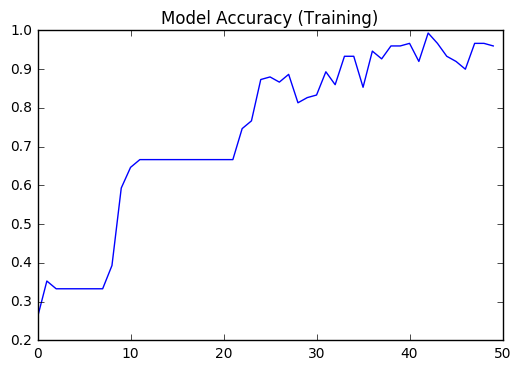

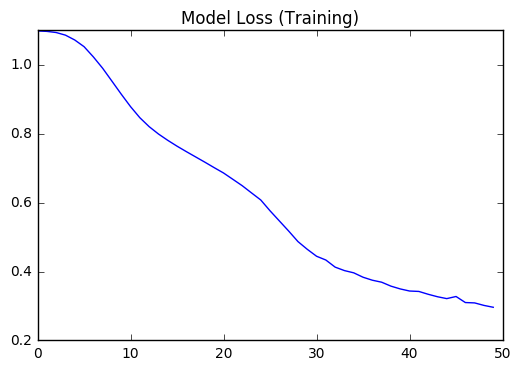

In [13]:
# Check the history of the model
import matplotlib.pyplot as plt
%matplotlib inline
model.history.keys()
plt.plot(model.history['acc'])
plt.title('Model Accuracy (Training)')
print 'The final model accuracy: ', model.history['acc'][-1]

plt.figure()
plt.title('Model Loss (Training)')
plt.plot(model.history['loss'])

# Binary Classification Of Sonar Returns
In this project I will use keras to classify the sonar data which can be found at:
https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

In [43]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
# Load the data
sonar_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data')

In [69]:
seed = 7
numpy.random.seed(seed=7)
dataset = sonar_data.values
X = dataset[:,:-1]
Y = dataset[:,-1]
print X.shape
print Y.shape

(207, 60)
(207,)


In [71]:
# Change the target values to 0 and 1
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [75]:
# Define function to build keras model
def create_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim=60, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [78]:
# create the model using the KerasClassifier function
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print 'Accuracy is: %.2f +/- %.2f' %((results.mean())*100, (results.std())*100)

Accuracy is: 80.61 +/- 8.27


# Dropout Regularization
In this section, I will continue with the sonar dataset but I will attempt to use dropout regularization to improve performance and reduce overfitting

# Boston Housing Regression
In this mini-project, I will examine the boston housing data regression problem using a sequential neural network

In [4]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [5]:
# Load the data
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
Y = dataset.target

In [6]:
def baseline_model():
    # Create the model
    model = Sequential()
    model.add(Dense(13, input_dim=13, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [7]:
# Use the keras regressor function to make an estimator which we can fit to the data
reg = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [20]:
kfold = KFold(n_splits=10)
results = cross_val_score(reg, X, Y, cv=kfold)
print 'Baseline %.2f +/ %.2f' %(results.mean(), results.std())

Baseline 31.59 +/ 21.59


In [26]:
Y.mean()

22.532806324110677

## Standardize the dataset
In the next section, I will first try to standardize the dataset using sklearn's pipeline framework. 

In [10]:
estimators = [('standardize', StandardScaler()), ('ML_regressor', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5))]

In [11]:
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print 'Standardized results: %.2f, +/- %.2f' %(results.mean(), results.std())

Epoch 1/50
455/455 [==============================] - 0s - loss: 597.6505     
Epoch 2/50
455/455 [==============================] - 0s - loss: 550.5507     
Epoch 3/50
455/455 [==============================] - 0s - loss: 454.9753     
Epoch 4/50
455/455 [==============================] - 0s - loss: 336.2777     
Epoch 5/50
455/455 [==============================] - 0s - loss: 225.9733     
Epoch 6/50
455/455 [==============================] - 0s - loss: 146.6369     
Epoch 7/50
455/455 [==============================] - 0s - loss: 100.3596     
Epoch 8/50
455/455 [==============================] - 0s - loss: 74.1992     
Epoch 9/50
455/455 [==============================] - 0s - loss: 58.0949     
Epoch 10/50
455/455 [==============================] - 0s - loss: 47.5359     
Epoch 11/50
455/455 [==============================] - 0s - loss: 40.6985     
Epoch 12/50
455/455 [==============================] - 0s - loss: 36.2880     
Epoch 13/50
455/455 [==============================] -